Optimal Rotation and Shift: (2, (10, -7))
Maximum MI Value: 1.038095239043658


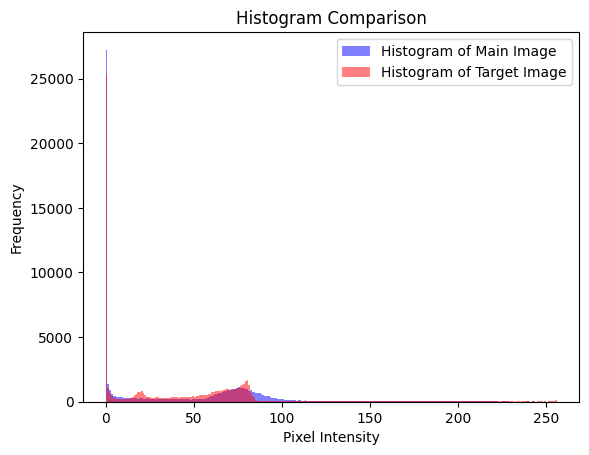

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def compute_mutual_information(img1, img2, num_bins=256):
    joint_histogram, _, _ = np.histogram2d(
        img1.ravel(),
        img2.ravel(),
        bins=num_bins
    )
    joint_histogram /= joint_histogram.sum()

    marginal_x = joint_histogram.sum(axis=1)  
    marginal_y = joint_histogram.sum(axis=0)  
    independent_prob = np.outer(marginal_x, marginal_y)

    non_zero_vals = joint_histogram > 0
    mutual_info = np.sum(joint_histogram[non_zero_vals] * np.log(joint_histogram[non_zero_vals] / independent_prob[non_zero_vals]))
    return mutual_info


def rotate_input_image(input_image, rotation_angle):
    (img_height, img_width) = input_image.shape[:2]
    center_point = (img_width // 2, img_height // 2)
    rot_matrix = cv2.getRotationMatrix2D(center_point, rotation_angle, 1.0)
    rotated_image = cv2.warpAffine(input_image, rot_matrix, (img_width, img_height))
    return rotated_image


def shift_input_image(input_image, x_translation, y_translation):
    (img_height, img_width) = input_image.shape[:2]
    trans_matrix = np.float32([[1, 0, x_translation], [0, 1, y_translation]])
    shifted_image = cv2.warpAffine(input_image, trans_matrix, (img_width, img_height))
    return shifted_image


def find_optimal_alignment(img1, img2, rotation_angles, translation_shifts):
    max_mutual_info = -np.inf
    optimal_parameters = (0, 0)  # (rotation, shift)

    for angle in rotation_angles:
        rotated_img = rotate_input_image(img2, angle)

        for x_trans, y_trans in translation_shifts:
            shifted_img = shift_input_image(rotated_img, x_trans, y_trans)
            mi_value = compute_mutual_information(img1, shifted_img)

            if mi_value > max_mutual_info:
                max_mutual_info = mi_value
                optimal_parameters = (angle, (x_trans, y_trans))

    return optimal_parameters, max_mutual_info


def display_dual_histogram(image1, image2, title1, title2):
    plt.hist(image1.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.5, label=title1)
    plt.hist(image2.ravel(), bins=256, range=(0, 256), color='red', alpha=0.5, label=title2)
    plt.title("Histogram Comparison")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()



image_main = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
image_target = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)

rotation_space = range(-30, 31, 2) 
translation_space = [(x, y) for x in range(-10, 11) for y in range(-10, 11)]  


optimal_params, max_mi_value = find_optimal_alignment(image_main, image_target, rotation_space, translation_space)

print("Optimal Rotation and Shift:", optimal_params)
print("Maximum MI Value:", max_mi_value)

display_dual_histogram(image_main,image_target,"Histogram of Main Image","Histogram of Target Image")